# 信用情報

Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。


Home Credit Default Risk | Kaggle


Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


- Home Creditはどのような企業？
- このコンペティションでは何を予測する？
- それを予測することで企業が得られるメリットは何？

- Home Creditはどのような企業？

ホームクレジットは、ポジティブで安全な借入を提供することにより、銀行を利用しない人々の金融包摂を拡大するよう努めている。 この十分なサービスを受けられていない人々がローンを確実に利用できるようにするために、さまざまな代替データ（通信会社やトランザクション情報など）を利用して、クライアントの返済能力を予測している。

※「金融包摂」とはやや堅い日本語ですが、英語 の”Financial Inclusion”を訳したもので、金融サービスへ取り込むこと、すなわち貧困 者や中小規模の事業者など、これまで基本的な金融サービスにアクセスすることが難しか った人々に手頃なコストでこれを提供していこうとするものです。

- このコンペティションでは何を予測する？

さまざまな統計的手法と機械学習手法を使用してクライアントの返済能力を予測を行う。

- それを予測することで企業が得られるメリットは何？

予測することで、返済可能なクライアントが拒否されないようにし、ローンが元本、満期日、返済カレンダーで提供されるため、クライアントの成功を後押しでき、企業のサービス向上へと繋がる。

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。


- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す

それぞれ結果に対する説明や考察も行ってください。

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
#欠損値を1つ以上含む特徴量の数
df.isnull().sum()[df.isnull().sum()>0].sort_values()

DAYS_LAST_PHONE_CHANGE           1
CNT_FAM_MEMBERS                  2
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
EXT_SOURCE_2                   660
                             ...  
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
COMMONAREA_MODE             214865
COMMONAREA_AVG              214865
COMMONAREA_MEDI             214865
Length: 67, dtype: int64

In [7]:
X = df.drop(['TARGET'], axis=1)
y = df.loc[:, 'TARGET']

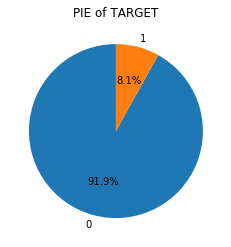

In [8]:
label_counts = y.value_counts()
plt.title('PIE of TARGET')
plt.pie(label_counts, labels=['0', '1'], startangle=90, autopct="%1.1f%%")
plt.show()

- TARGET=1は支払いに問題があるクライアントで、分割支払いの少なくとも1つで一定期間以上の遅延支払いをした者
- TARGET=0はそれ以外の者

返済能力が低いクライアントの割合が8.1%ほどであることが分かる。

In [9]:
import missingno as msno

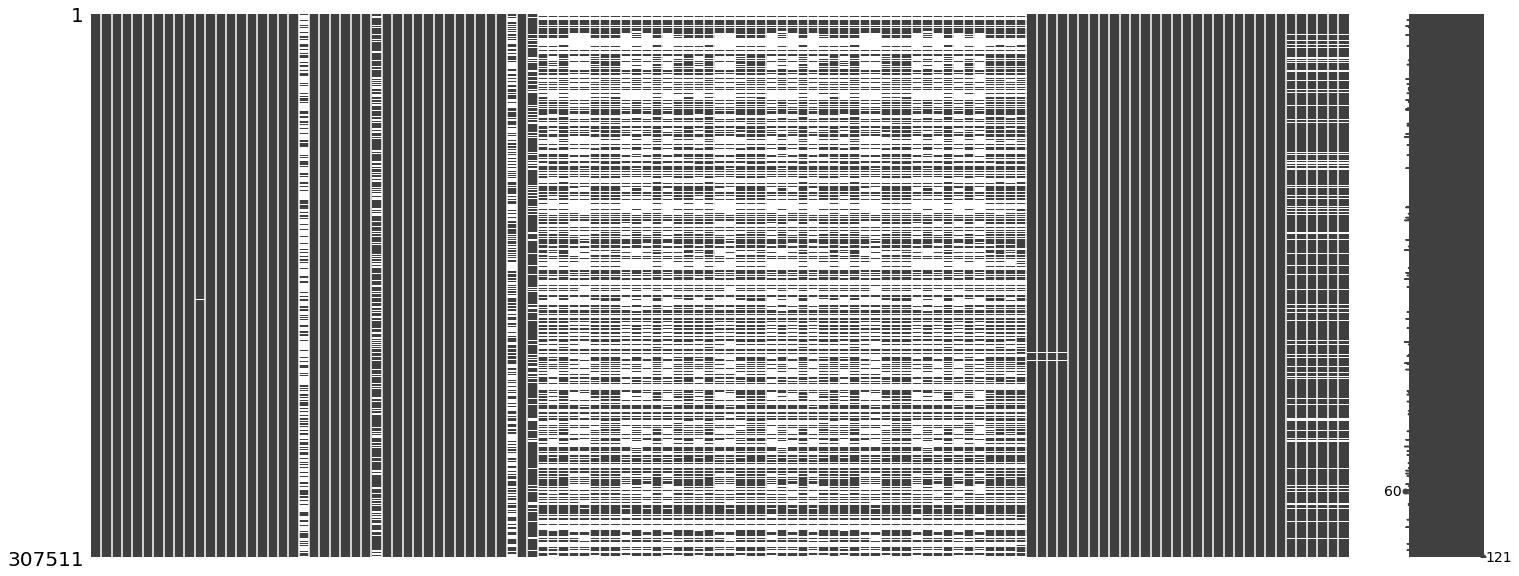

In [10]:
msno.matrix(X)

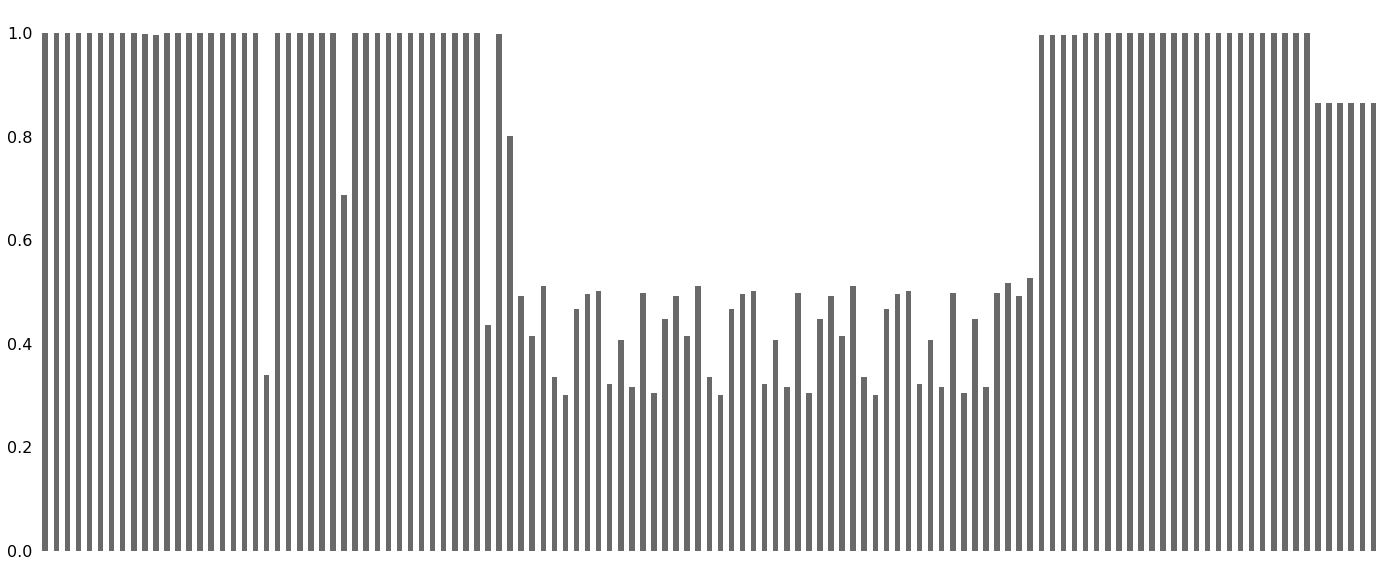

In [11]:
msno.bar(X)

##  【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください

- 特徴量を大局的に見て傾向を探る
    - 欠損値があるデータはどこまで量まで許容するか -> 今回は欠損値を持たない特徴量に絞る
    - 目的変数と相関が高い特徴量で探る
    - 感覚的に返済能力と関係がありそうな特徴量で探る
      - 財産関係
      - 職種
      - 家族構成


- 特徴量を1つ1つ見ていく
    - 特徴量ごとの値の割合
    - 特徴量ごとの値の割合を目的変数で場合分け

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

### 欠損値が無い数値の特徴量の中から目的関数と相関が高いものを選ぶ。それらを軸にしたグラフにラベルごとにプロットして規則性や傾向を探る。

In [12]:
cor_sp = df.corr()['TARGET'] 
cor_sp2 = cor_sp.abs().sort_values()[-21: -1]
cor_sp2

REGION_POPULATION_RELATIVE     0.037227
OWN_CAR_AGE                    0.037612
AMT_GOODS_PRICE                0.039645
DAYS_REGISTRATION              0.041975
FLOORSMAX_MODE                 0.043226
FLOORSMAX_MEDI                 0.043768
FLOORSMAX_AVG                  0.044003
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
DAYS_EMPLOYED                  0.044932
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
EXT_SOURCE_1                   0.155317
EXT_SOURCE_2                   0.160472
EXT_SOURCE_3                   0.178919
Name: TARGET, dtype: float64

目的関数と相関が高い説明変数を抽出
- DAYS_BIRTH                     0.078239　年齢が影響か
- REGION_RATING_CLIENT_W_CITY    0.060893　住んでいる地域の評価(貧困地域か)と影響か
- REGION_RATING_CLIENT           0.058899　同上
- DAYS_LAST_PHONE_CHANGE         0.055218　最後に電話を変えてからの日数
- DAYS_ID_PUBLISH                0.051457　IDを交換してからの日数

In [13]:
#欠損値をもつ特徴量を抽出
total = df.isnull().sum()[df.isnull().sum()>0].sort_values()
missing_df = pd.DataFrame(total, columns=['total'])
missing_df['missing_ratio'] = total / len(df)
missing_df

,total,missing_ratio
DAYS_LAST_PHONE_CHANGE,1,0.000003
CNT_FAM_MEMBERS,2,0.000007
AMT_ANNUITY,12,0.000039
AMT_GOODS_PRICE,278,0.000904
EXT_SOURCE_2,660,0.002146
...,...,...
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
COMMONAREA_MODE,214865,0.698723
COMMONAREA_AVG,214865,0.698723


In [14]:
missing_feature_list = list(missing_df.index)
missing_feature_list

['DAYS_LAST_PHONE_CHANGE',
 'CNT_FAM_MEMBERS',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_2',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'EXT_SOURCE_3',
 'OCCUPATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'TOTALAREA_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'HOUSETYPE_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'WALLSMATERIAL_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'EXT_S

In [15]:
df_v2 = df.drop(missing_feature_list, axis=1).dropna(how='any', axis=0)
df_v2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,...,0,0,0,0,0,0,0,0,0,0


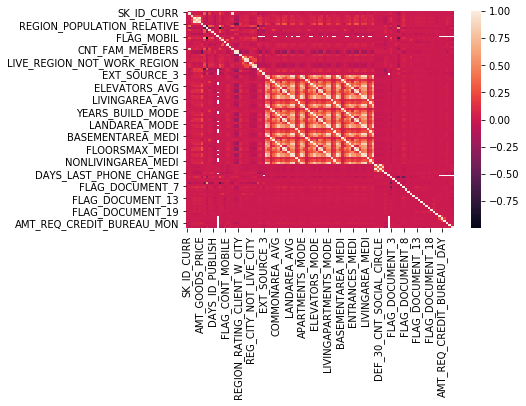

In [16]:
#欠損値をもたない特徴量でヒートマップを作製
X_v2 = df.drop(['TARGET'], axis=1)

sns.heatmap(X_v2.corr())

In [17]:
cor_sp3 = X_v2.corr().unstack() #unstack()で行から列にピボット
cor_sp4 = cor_sp3.dropna(how='any')[cor_sp3 != 1.0] #値が1のものを削除
cor_sp4.abs().sort_values()[-21:-1] #絶対値をとり、ソート

BASEMENTAREA_AVG          BASEMENTAREA_MEDI           0.994317
APARTMENTS_AVG            APARTMENTS_MEDI             0.995081
APARTMENTS_MEDI           APARTMENTS_AVG              0.995081
LIVINGAREA_AVG            LIVINGAREA_MEDI             0.995596
LIVINGAREA_MEDI           LIVINGAREA_AVG              0.995596
COMMONAREA_AVG            COMMONAREA_MEDI             0.995978
COMMONAREA_MEDI           COMMONAREA_AVG              0.995978
ELEVATORS_AVG             ELEVATORS_MEDI              0.996099
ELEVATORS_MEDI            ELEVATORS_AVG               0.996099
ENTRANCES_AVG             ENTRANCES_MEDI              0.996886
ENTRANCES_MEDI            ENTRANCES_AVG               0.996886
FLOORSMAX_AVG             FLOORSMAX_MEDI              0.997034
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997034
FLOORSMIN_AVG             FLOORSMIN_MEDI              0.997241
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997241
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0

上図の相関係数が高い特徴量を見ていくと、
- そもそも質的変数と量的変数を区別していないかった
- 同じカテゴリーの平均値と中央値のペアなどが多い

ここから散布図を作っても有益な情報が得られないことに気づく。そこで特徴量ある程度絞って一つずつ見ていくことにする。

### 特徴量を細かく見ていく

In [18]:
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

各特徴量について、
- 左図に値ごとのデータ数
- 右図にTARGET=1、つまり支払い能力が十分でない人が占める割合

を表す棒グラフを作成する関数を作る。

In [19]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    #特徴量featureの値ごとの出現回数のDataFrmae、df1を作製
    temp = df[feature].value_counts() 
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    #TARGET=1のデータ数がカテゴリー全部のデータ数に占める割合を計算する
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    #グラフを横に並べる時と縦に並べる時で場合分け
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation): #x軸ラベルが長いときは90度回転させる
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [20]:
temp = df['NAME_CONTRACT_TYPE'].value_counts() 
df1 = pd.DataFrame({'NAME_CONTRACT_TYPE': temp.index,'Number of contracts': temp.values})
df1

,NAME_CONTRACT_TYPE,Number of contracts
0,Cash loans,278232
1,Revolving loans,29279


In [21]:
cat_perc = df[['NAME_CONTRACT_TYPE', 'TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
cat_perc

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


#### ローンのタイプ

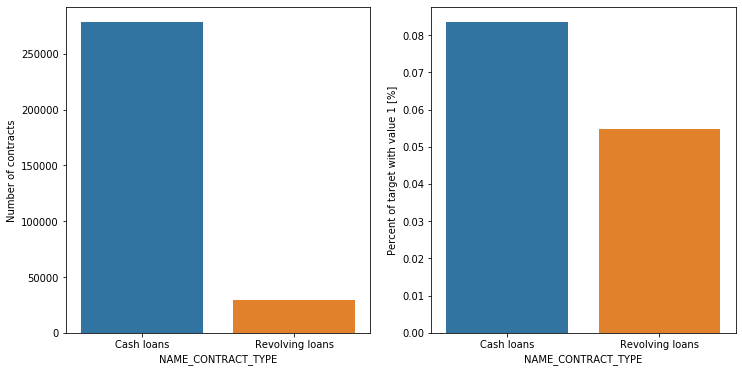

In [23]:
plot_stats('NAME_CONTRACT_TYPE')

リボルビングローンの割合は全体の10%程の小さい範囲に収まっている。
また、返済が守られなかったリボルビングローンの割合は、その利用率と比較して大きいことも分かる。

※リボルビングローンとは一定の与信枠の範囲内において、自由に反復借り入れが可能で、返済については一定のミニマルペイメントでよいというタイプのローン

#### クライアントの性別

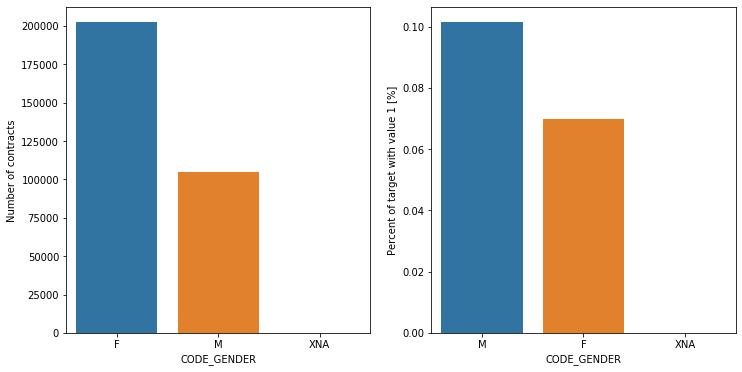

In [24]:
plot_stats('CODE_GENDER')

クライアントは女性が男性の2倍を占めている。
しかし未返済者の男女比は、男性が女性よりも割合が多い。

#### 車や不動産の所有

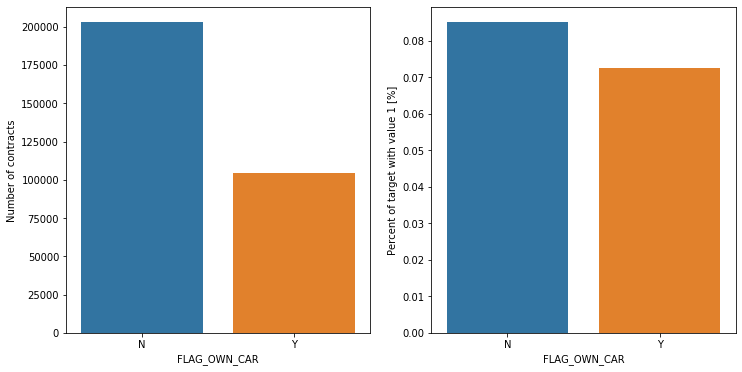

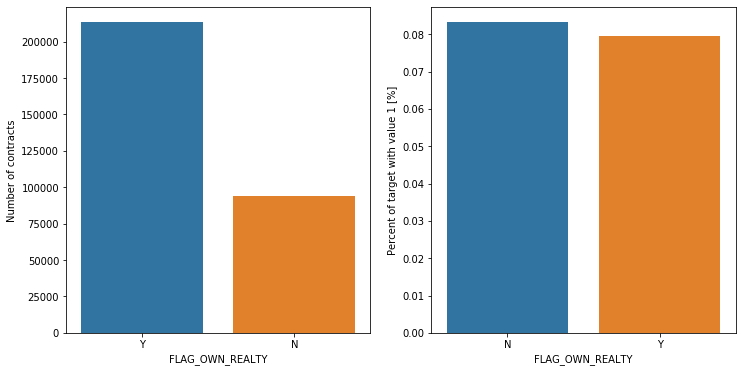

In [25]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

車を所有しているクライアントの割合は所有していないクライアントの半分。未返済者率は、車を所有しているクライアントが所有していないクライアントより少しだけ高い。

不動産を所有しているクライアントの割合は所有していないクライアントの2倍以上。未返済者率は、不動産を所有しているクライアントが所有していないクライアントよりごく少しだけ低いが、どちらもおよそ8%である。

#### クライアントの家族状況

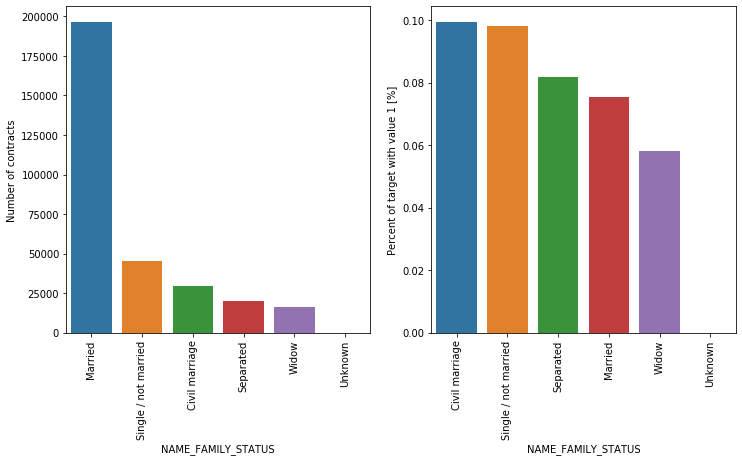

In [26]:
plot_stats('NAME_FAMILY_STATUS',True, True)

ほとんどのクライアントは既婚で、その次に独身、民事婚者と続く。
未返済者率に関しては、民事婚者の割合が一番高く、未亡人が一番低い

#### 子供の数

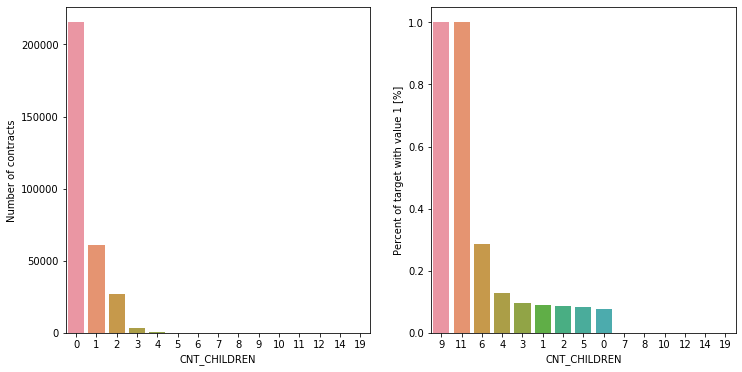

In [27]:
plot_stats('CNT_CHILDREN')

ほとんどのクライアントは子供は持っていない。1人の子供を持つクライアントはその4分の1、2人の子供を持つクライアントは8分の1、3人以上の子供を持つクライアントはさらに少ない。

未返済者率に関しては、9人と11人の子供を持つクライアントは100%、4人と6人の子供を持つクライアントは平均以上の割合を示し、1人、2人、3人、5人の子供を持つクライアントは平均付近の割合である。

#### クライアントの家族構成

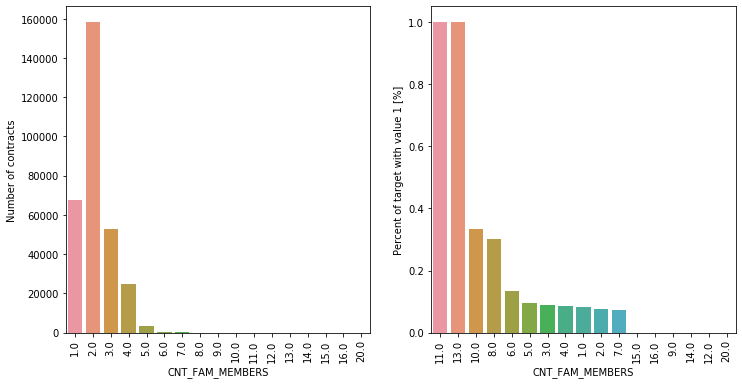

In [28]:
plot_stats('CNT_FAM_MEMBERS',True)

2人家族が最も多く、単身、3人家族と続く。

未返済者率に関しては11人、13人家族の割合が100%、10人、8人家族は30%前後、6人以下の家族は10%前後となっている。

#### 収入の種類

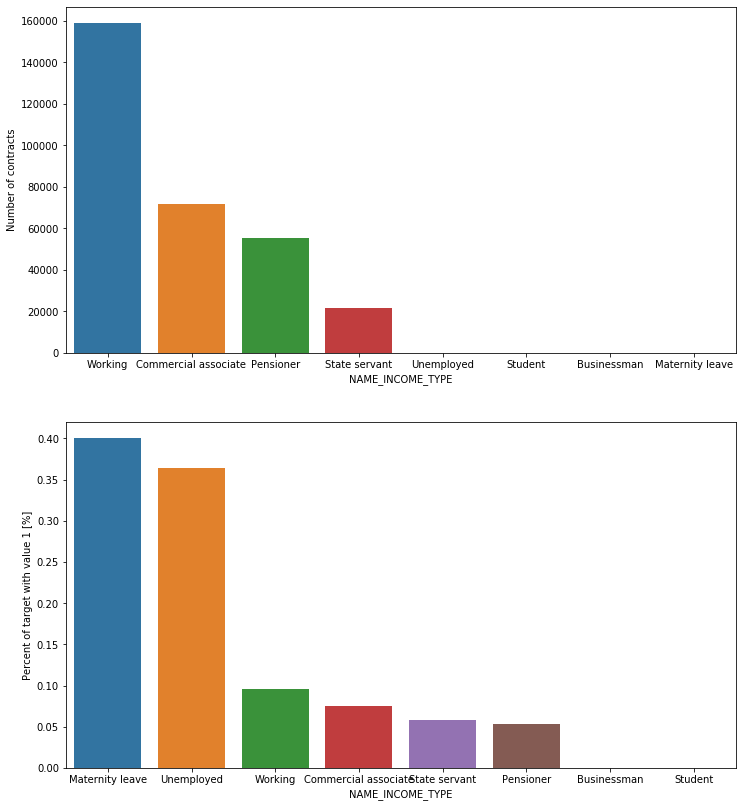

In [29]:
plot_stats('NAME_INCOME_TYPE',False,False)

ほとんどのクライアントの収入源は仕事からで、事業提携、年金、公務が続く。

産休中のクライアントが未返済者の4割を占め、無職者の割合がその次に多い。残りの割合はいずれも10%以下と小さい値を示す。

#### クライアントの職種

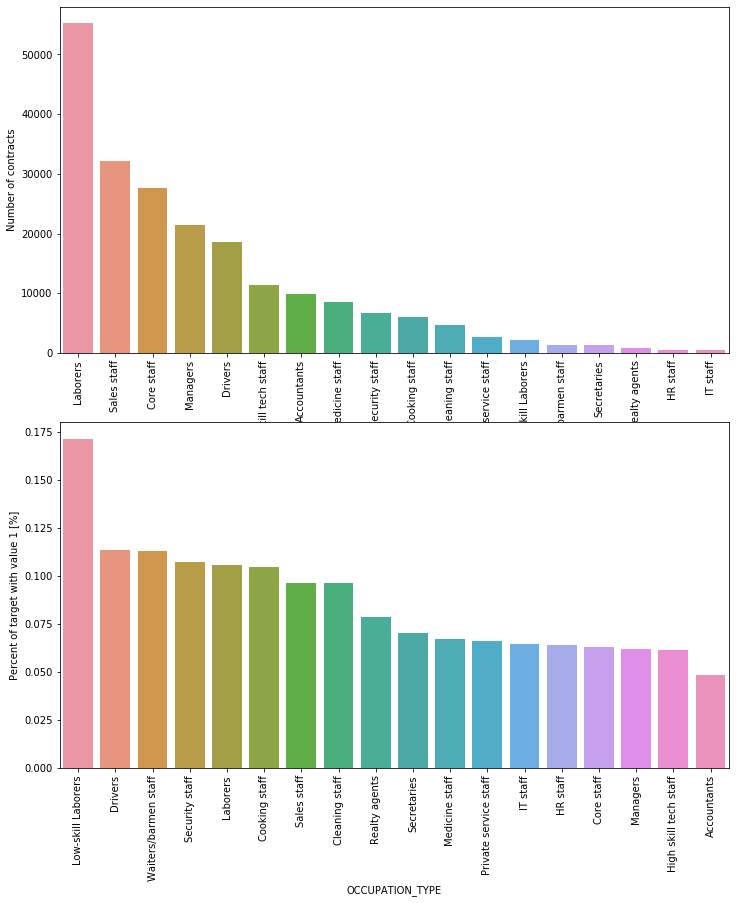

In [30]:
plot_stats('OCCUPATION_TYPE',True, False)

ほとんどのローンは肉体労働者によって占められ、販売員が後に続く。ITスタッフは最も少ない。

未返済者を最も多く占めるのは技術力が低い肉体労働者で、運転手、ウェイターやバーテンダー、警備員、肉体労働者、料理人と続く。

#### 組織の種類

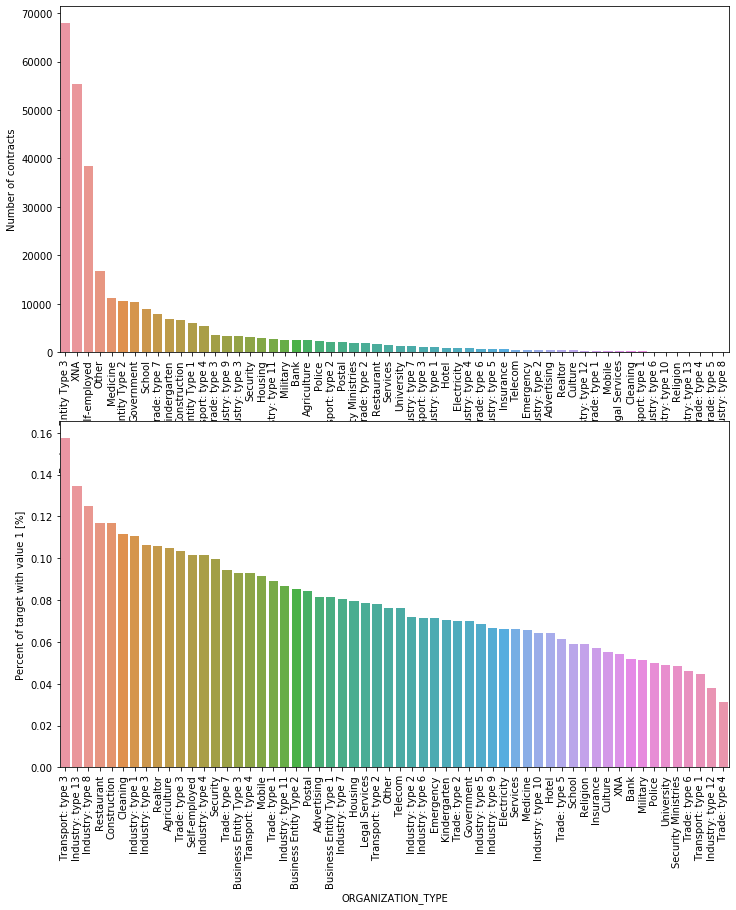

In [31]:
plot_stats('ORGANIZATION_TYPE',True, False)

未返済者の割合を大きく占める順から、交通(タイプ3)、産業(タイプ3)、産業(タイプ13)、産業(タイプ8)、レストランとなっている。

#### クライアントの学歴

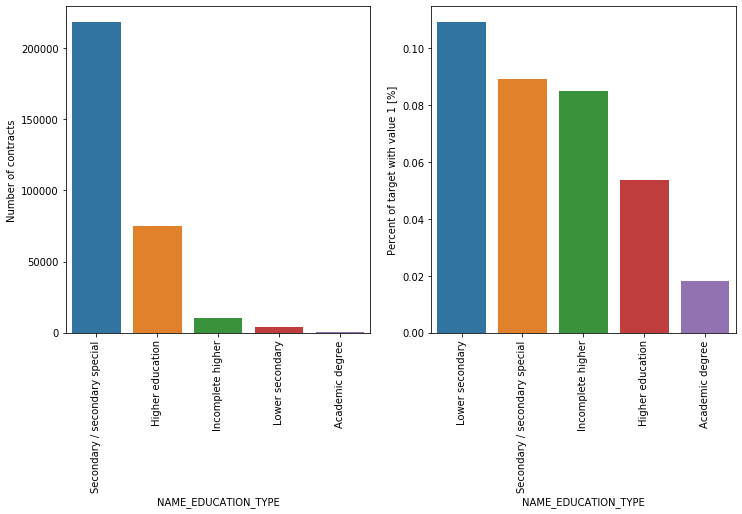

In [32]:
plot_stats('NAME_EDUCATION_TYPE',True)

ほとんどのクライアントの学歴は中等教育で、高等教育が続き、ごく少数が学位を持っている。

未返済者の割合が最も大きいのは11%の前期中等教育で、学位保持者の割合は2%以下であることが分かる。

####  住居の種類

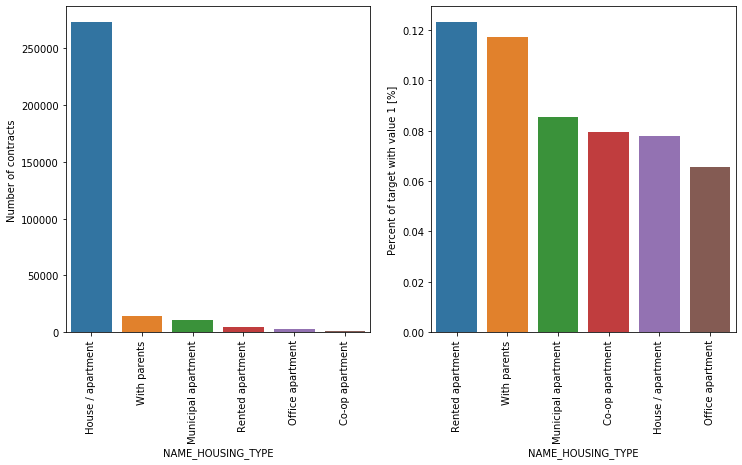

In [33]:
plot_stats('NAME_HOUSING_TYPE',True)

25万以上ものクライアントは一軒家もしくはマンションに住んでおり、それ以外の割合はごくわずかである。

未返済者の割合を大きく占めるものは賃貸と実家暮らしで、これらは10%を超えることが分かる。